In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pathlib import Path
import re

# pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [112]:
import os
import pandas as pd

path = 'csv\\'
files = [file for file in os.listdir(path) if file.endswith(".csv")]

output = pd.Series(name="Rows", dtype=int)
for file in files:
    df = pd.read_csv(os.path.join(path, file))
    output.at[file.replace(".csv", "")] = df.shape[0]
output.at["Total"] = output.sum()

In [113]:
pd.unique(df['URL'])

array(['unknown', 'True'], dtype=object)

In [114]:
output

database0-500            436
database1000-2000        865
database10000-10200      147
database10200-10300       84
database10300-10400       81
                       ...  
database9600-9700         82
database9700-9800         81
database9800-9900         80
database9900-10000        77
Total                  50004
Name: Rows, Length: 343, dtype: int64

In [115]:
# df1 = pd.read_csv('csv\\database0-500.csv')
# df2 = pd.read_csv('csv\\database500-1000.csv')
# df3 = pd.read_csv('csv\\database1000-2000.csv')
# df4 = pd.read_csv('csv\\database2000-3000.csv')
# df5 = pd.read_csv('csv\\database3000-3500.csv')
# df6 = pd.read_csv('csv\\database3500-4000.csv')
# df7 = pd.read_csv('csv\\database4000-4500.csv')
# df8 = pd.read_csv('csv\\database4500-5000.csv')
# df9 = pd.read_csv('csv\\database5500-6000.csv')
# df10 = pd.read_csv('csv\\database6000-6500.csv')
# df11 = pd.read_csv('csv\\database6500-7000.csv')
# df12 = pd.read_csv('csv\\database7000-7500.csv')
# df13 = pd.read_csv('csv\\database7500-8000.csv')
# df14 = pd.read_csv('csv\\database8000-8100.csv')
# df15 = pd.read_csv('csv\\database8100-8200.csv')
# df16 = pd.read_csv('csv\\database8200-8300.csv')
# df17 = pd.read_csv('csv\\database8300-8400.csv')
# df18 = pd.read_csv('csv\\database8400-8500.csv')
# df19 = pd.read_csv('csv\\database8500-8600.csv')
# df20 = pd.read_csv('csv\\database8600-8700.csv')
# df21 = pd.read_csv('csv\\database8700-8800.csv')
# df22 = pd.read_csv('csv\\database8800-8900.csv')
# df23 = pd.read_csv('csv\\database8900-9000.csv')
# df24 = pd.read_csv('csv\\database9000-9100.csv')
# df25 = pd.read_csv('csv\\database9100-9200.csv')
# df26 = pd.read_csv('csv\\database9200-9300.csv')
# df27 = pd.read_csv('csv\\database9300-9400.csv')
# df28 = pd.read_csv('csv\\database9400-9500.csv')
# df29 = pd.read_csv('csv\\database9500-9600.csv')
# df30 = pd.read_csv('csv\\database9600-9700.csv')
# df31 = pd.read_csv('csv\\database9700-9800.csv')
# df32 = pd.read_csv('csv\\database9800-9900.csv')
# df33 = pd.read_csv('csv\\database9900-10000.csv')
# df34 = pd.read_csv('csv\\database10000-10200.csv')
# df36 = pd.read_csv('csv\\database10200-10300.csv')
# df37 = pd.read_csv('csv\\database10300-10400.csv')
# df38 = pd.read_csv('csv\\database10400-10500.csv')
# df39 = pd.read_csv('csv\\database10500-10600.csv')
# df40 = pd.read_csv('csv\\database10600-10700.csv')
# df41 = pd.read_csv('csv\\database10700-10800.csv')
# df42 = pd.read_csv('csv\\database10800-10900.csv')
# df43 = pd.read_csv('csv\\database10900-11000.csv')
# df44 = pd.read_csv('csv\\database11000-11100.csv')
# df45 = pd.read_csv('csv\\database11100-11200.csv')
# df46 = pd.read_csv('csv\\database11200-11300.csv')
# df47 = pd.read_csv('csv\\database11300-11400.csv')
# df48 = pd.read_csv('csv\\database11400-11500.csv')
# df49 = pd.read_csv('csv\\database11500-11600.csv')
# df50 = pd.read_csv('csv\\database11600-11700.csv')
# df51 = pd.read_csv('csv\\database11700-11800.csv')
# df52 = pd.read_csv('csv\\database11800-11900.csv')
# df53 = pd.read_csv('csv\\database11900-12000.csv')
# df54 = pd.read_csv('csv\\database12000-12100.csv')
# df55 = pd.read_csv('csv\\database12100-12200.csv')
# df56 = pd.read_csv('csv\\database12200-12300.csv')
# df57 = pd.read_csv('csv\\database12300-12400.csv')
# df58 = pd.read_csv('csv\\database12400-12500.csv')


# files = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df37, df48, df39, df50, df51, df52, df53, df54, df55, df56, df57, df58]

# pd.concat(files).to_csv('csv\\database.csv')

In [116]:
# df1 = pd.read_csv('csv\\database12500-12600.csv')
# df2 = pd.read_csv('csv\\database12600-12700.csv')
# df3 = pd.read_csv('csv\\database12700-12800.csv')
# df4 = pd.read_csv('csv\\database12800-12900.csv')
# df5 = pd.read_csv('csv\\database12900-13000.csv')
# df6 = pd.read_csv('csv\\database13000-13100.csv')
# df7 = pd.read_csv('csv\\database13100-13200.csv')
# df8 = pd.read_csv('csv\\database13200-13300.csv')
# df9 = pd.read_csv('csv\\database13300-13400.csv')
# df10 = pd.read_csv('csv\\database13400-13500.csv')
# df11 = pd.read_csv('csv\\database13500-13600.csv')
# df12 = pd.read_csv('csv\\database13600-13700.csv')
# df13 = pd.read_csv('csv\\database13700-13800.csv')
# df14 = pd.read_csv('csv\\database13800-13900.csv')
# df15 = pd.read_csv('csv\\database13900-14000.csv')
# df16 = pd.read_csv('csv\\database14000-14100.csv')
# df17 = pd.read_csv('csv\\database14100-14200.csv')
# df18 = pd.read_csv('csv\\database14200-14300.csv')
# df19 = pd.read_csv('csv\\database14300-14400.csv')
# df20 = pd.read_csv('csv\\database14400-14500.csv')
# df21 = pd.read_csv('csv\\database14500-14600.csv')
# df22 = pd.read_csv('csv\\database14600-14700.csv')
# df23 = pd.read_csv('csv\\database14700-14800.csv')
# df24 = pd.read_csv('csv\\database14800-14900.csv')
# df25 = pd.read_csv('csv\\database14900-15000.csv')
# df26 = pd.read_csv('csv\\database15100-15200.csv')
# df27 = pd.read_csv('csv\\database15200-15300.csv')
# df28 = pd.read_csv('csv\\database15300-15400.csv')
# df29 = pd.read_csv('csv\\database15400-15500.csv')
# df30 = pd.read_csv('csv\\database15500-15600.csv')
# df31 = pd.read_csv('csv\\database15600-15700.csv')
# df32 = pd.read_csv('csv\\database15700-15800.csv')
# df33 = pd.read_csv('csv\\database15800-15900.csv')
# df34 = pd.read_csv('csv\\database15900-16000.csv')
# df36 = pd.read_csv('csv\\database16000-16100.csv')
# df37 = pd.read_csv('csv\\database16100-16200.csv')
# df38 = pd.read_csv('csv\\database16200-16300.csv')
# df39 = pd.read_csv('csv\\database16200-16300.csv')
# df40 = pd.read_csv('csv\\database16300-16400.csv')
# df41 = pd.read_csv('csv\\database16400-16500.csv')
# df42 = pd.read_csv('csv\\database16500-16600.csv')
# df43 = pd.read_csv('csv\\database16600-16700.csv')
# df44 = pd.read_csv('csv\\database16700-16800.csv')
# df45 = pd.read_csv('csv\\database16800-16900.csv')
# df46 = pd.read_csv('csv\\database16900-17000.csv')
# df47 = pd.read_csv('csv\\database17000-17100.csv')
# df48 = pd.read_csv('csv\\database17100-17200.csv')
# df49 = pd.read_csv('csv\\database17200-17300.csv')
# df50 = pd.read_csv('csv\\database17300-17400.csv')
# df51 = pd.read_csv('csv\\database17400-17500.csv')
# df52 = pd.read_csv('csv\\database17500-17600.csv')
# df53 = pd.read_csv('csv\\database17600-17700.csv')
# df54 = pd.read_csv('csv\\database17800-17900.csv')
# df55 = pd.read_csv('csv\\database17900-18000.csv')
# df56 = pd.read_csv('csv\\database18000-18100.csv')
# df57 = pd.read_csv('csv\\database18100-18200.csv')
# df58 = pd.read_csv('csv\\database18200-18300.csv')


# files = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df37, df48, df39, df50, df51, df52, df53, df54, df55, df56, df57, df58]

# pd.concat(files).to_csv('csv\\database1.csv')

In [117]:
# df1 = pd.read_csv('csv\\database18300-18400.csv')
# df2 = pd.read_csv('csv\\database18400-18500.csv')
# df3 = pd.read_csv('csv\\database18500-18600.csv')
# df4 = pd.read_csv('csv\\database18600-18700.csv')
# df5 = pd.read_csv('csv\\database18700-18800.csv')
# df6 = pd.read_csv('csv\\database18800-18900.csv')
# df7 = pd.read_csv('csv\\database18900-19000.csv')
# df8 = pd.read_csv('csv\\database19000-19100.csv')
# df9 = pd.read_csv('csv\\database19100-19200.csv')
# df10 = pd.read_csv('csv\\database19200-19300.csv')
# df11 = pd.read_csv('csv\\database19300-19400.csv')
# df12 = pd.read_csv('csv\\database19400-19500.csv')
# df13 = pd.read_csv('csv\\database19500-19600.csv')
# df14 = pd.read_csv('csv\\database19600-19700.csv')
# df15 = pd.read_csv('csv\\database19700-19800.csv')
# df16 = pd.read_csv('csv\\database19800-19900.csv')
# df17 = pd.read_csv('csv\\database19900-20000.csv')
# df18 = pd.read_csv('csv\\database20000-20100.csv')
# df19 = pd.read_csv('csv\\database20100-20200.csv')
# df20 = pd.read_csv('csv\\database20200-20300.csv')
# df21 = pd.read_csv('csv\\database20300-20400.csv')
# df22 = pd.read_csv('csv\\database20400-20500.csv')
# df23 = pd.read_csv('csv\\database20500-20600.csv')
# df24 = pd.read_csv('csv\\database20600-20700.csv')
# df25 = pd.read_csv('csv\\database20700-20800.csv')
# df26 = pd.read_csv('csv\\database20800-20900.csv')
# df27 = pd.read_csv('csv\\database20900-21000.csv')
# df28 = pd.read_csv('csv\\database21000-21100.csv')
# df29 = pd.read_csv('csv\\database21100-21200.csv')
# df30 = pd.read_csv('csv\\database21200-21300.csv')
# df31 = pd.read_csv('csv\\database21300-21400.csv')
# df32 = pd.read_csv('csv\\database21400-21500.csv')
# df33 = pd.read_csv('csv\\database21500-21600.csv')
# df34 = pd.read_csv('csv\\database21600-21700.csv')
# df36 = pd.read_csv('csv\\database21700-21800.csv')
# df37 = pd.read_csv('csv\\database21800-21900.csv')
# df38 = pd.read_csv('csv\\database21900-22000.csv')
# df39 = pd.read_csv('csv\\database22000-22100.csv')
# df40 = pd.read_csv('csv\\database22100-22200.csv')
# df41 = pd.read_csv('csv\\database22200-22300.csv')
# df42 = pd.read_csv('csv\\database22300-22400.csv')
# df43 = pd.read_csv('csv\\database22400-22500.csv')
# df44 = pd.read_csv('csv\\database22500-22600.csv')
# df45 = pd.read_csv('csv\\database22600-22700.csv')
# df46 = pd.read_csv('csv\\database22700-22800.csv')
# df47 = pd.read_csv('csv\\database22800-22900.csv')
# df48 = pd.read_csv('csv\\database22900-23000.csv')
# df49 = pd.read_csv('csv\\database23000-23100.csv')
# df50 = pd.read_csv('csv\\database23100-23200.csv')
# df51 = pd.read_csv('csv\\database23200-23300.csv')
# df52 = pd.read_csv('csv\\database23300-23400.csv')
# df53 = pd.read_csv('csv\\database23400-23500.csv')
# df54 = pd.read_csv('csv\\database23500-23600.csv')
# df55 = pd.read_csv('csv\\database23600-23700.csv')
# df56 = pd.read_csv('csv\\database23700-23800.csv')
# df57 = pd.read_csv('csv\\database23800-23900.csv')
# df58 = pd.read_csv('csv\\database23900-24000.csv')


# files = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df37, df48, df39, df50, df51, df52, df53, df54, df55, df56, df57, df58]

# pd.concat(files).to_csv('csv\\database2.csv')

In [118]:
# df1 = pd.read_csv('csv\\database24000-24100.csv')
# df2 = pd.read_csv('csv\\database24100-24200.csv')
# df3 = pd.read_csv('csv\\database24200-24300.csv')
# df4 = pd.read_csv('csv\\database24300-24400.csv')
# df5 = pd.read_csv('csv\\database24400-24500.csv')
# df6 = pd.read_csv('csv\\database24500-24600.csv')
# df7 = pd.read_csv('csv\\database24600-24700.csv')
# df8 = pd.read_csv('csv\\database24700-24800.csv')
# df9 = pd.read_csv('csv\\database24800-24900.csv')
# df10 = pd.read_csv('csv\\database24900-25000.csv')
# df11 = pd.read_csv('csv\\database25000-25500.csv')
# df12 = pd.read_csv('csv\\database25500-25700.csv')
# df13 = pd.read_csv('csv\\database25700-26000.csv')
# df14 = pd.read_csv('csv\\database26000-26200.csv')
# df15 = pd.read_csv('csv\\database26200-26400.csv')
# df16 = pd.read_csv('csv\\database26400-26600.csv')
# df17 = pd.read_csv('csv\\database26600-26800.csv')
# df18 = pd.read_csv('csv\\database26800-27000.csv')
# df19 = pd.read_csv('csv\\database27000-27200.csv')
# df20 = pd.read_csv('csv\\database27200-27300.csv')
# df21 = pd.read_csv('csv\\database27300-27400.csv')
# df22 = pd.read_csv('csv\\database27400-27500.csv')
# df23 = pd.read_csv('csv\\database27500-27600.csv')
# df24 = pd.read_csv('csv\\database27600-27700.csv')
# df25 = pd.read_csv('csv\\database27700-27800.csv')
# df26 = pd.read_csv('csv\\database27800-27900.csv')
# df27 = pd.read_csv('csv\\database27900-28000.csv')
# df28 = pd.read_csv('csv\\database28000-28100.csv')
# df29 = pd.read_csv('csv\\database28100-28200.csv')
# df30 = pd.read_csv('csv\\database28200-28300.csv')
# df31 = pd.read_csv('csv\\database28300-28400.csv')
# df32 = pd.read_csv('csv\\database28400-28500.csv')
# df33 = pd.read_csv('csv\\database28500-28600.csv')
# df34 = pd.read_csv('csv\\database28600-28700.csv')
# df36 = pd.read_csv('csv\\database28700-28800.csv')
# df37 = pd.read_csv('csv\\database28800-28900.csv')
# df38 = pd.read_csv('csv\\database28900-29000.csv')
# df39 = pd.read_csv('csv\\database29000-29100.csv')
# df40 = pd.read_csv('csv\\database29100-29200.csv')
# df41 = pd.read_csv('csv\\database29200-29300.csv')
# df42 = pd.read_csv('csv\\database29300-29400.csv')
# df43 = pd.read_csv('csv\\database29400-29500.csv')
# df44 = pd.read_csv('csv\\database29500-29600.csv')
# df45 = pd.read_csv('csv\\database29600-29700.csv')
# df46 = pd.read_csv('csv\\database29700-29800.csv')
# df47 = pd.read_csv('csv\\database29800-29900.csv')
# df48 = pd.read_csv('csv\\database29900-30000.csv')


# files = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df36, df37, df38, df39, df40, df41, df42, df43, df44, df45, df46, df37, df48]

# pd.concat(files).to_csv('csv\\database3.csv')

In [119]:
# df1 = pd.read_csv('csv\\database30000-30500.csv')
# df2 = pd.read_csv('csv\\database30500-31000.csv')
# df3 = pd.read_csv('csv\\database31000-31500.csv')
# df4 = pd.read_csv('csv\\database31500-32000.csv')
# df5 = pd.read_csv('csv\\database32000-32500.csv')
# df6 = pd.read_csv('csv\\database32500-33300.csv')
# df7 = pd.read_csv('csv\\database33300-34000.csv')
# df9 = pd.read_csv('csv\\database34000-34500.csv')
# df10 = pd.read_csv('csv\\database34500-35000.csv')
# df11 = pd.read_csv('csv\\database35000-35500.csv')
# df12 = pd.read_csv('csv\\database35500-36000.csv')
# df13 = pd.read_csv('csv\\database36000-36500.csv')
# df14 = pd.read_csv('csv\\database36500-37000.csv')
# df15 = pd.read_csv('csv\\database37000-37500.csv')
# df16 = pd.read_csv('csv\\database37500-38000.csv')
# df17 = pd.read_csv('csv\\database38000-38500.csv')
# df18 = pd.read_csv('csv\\database38500-39000.csv')
# df19 = pd.read_csv('csv\\database39000-39500.csv')
# df20 = pd.read_csv('csv\\database39500-40000.csv')
# df21 = pd.read_csv('csv\\database40000-40500.csv')
# df22 = pd.read_csv('csv\\database40500-41000.csv')
# df23 = pd.read_csv('csv\\database41000-41500.csv')
# df24 = pd.read_csv('csv\\database41500-42000.csv')
# df25 = pd.read_csv('csv\\database42000-42500.csv')
# df26 = pd.read_csv('csv\\database42500-43000.csv')
# df27 = pd.read_csv('csv\\database43000-43500.csv')
# df28 = pd.read_csv('csv\\database43500-44000.csv')
# df29 = pd.read_csv('csv\\database44000-44500.csv')
# df30 = pd.read_csv('csv\\database44500-45000.csv')
# df31 = pd.read_csv('csv\\database45000-45500.csv')
# df32 = pd.read_csv('csv\\database45500-46000.csv')
# df33 = pd.read_csv('csv\\database46000-46500.csv')
# df34 = pd.read_csv('csv\\database46500-47000.csv')
# df36 = pd.read_csv('csv\\database47000-47500.csv')
# df37 = pd.read_csv('csv\\database47500-48000.csv')
# df38 = pd.read_csv('csv\\database48000-48300.csv')
# df39 = pd.read_csv('csv\\database48300-48600.csv')
# df40 = pd.read_csv('csv\\database48600-49000.csv')
# df41 = pd.read_csv('csv\\database49000-49300.csv')



# files = [df1, df2, df3, df4, df5, df6, df7, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30, df31, df32, df33, df34, df36, df37, df38, df39, df40, df41]

# pd.concat(files).to_csv('csv\\database4.csv')

In [120]:
# df = pd.read_csv('csv\\database.csv')
# df1 = pd.read_csv('csv\\database1.csv')
# df2 = pd.read_csv('csv\\database2.csv')
# df3 = pd.read_csv('csv\\database3.csv')
# df4 = pd.read_csv('csv\\database4.csv')

# files = [df, df1, df2, df3, df4]

# pd.concat(files).to_csv('main1.csv')

In [121]:
result = Path('csv\\').glob('*.csv')
csvfiles = sorted(result, key = lambda x: [int(k) if k.isdigit() else k for k in re.split('([0-9]+)', x.stem)])

df = pd.DataFrame()
for files in csvfiles:
    df = df.append(pd.read_csv(files))

df.to_csv('main.csv')

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_7352\1193512127.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(files))
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_7352\1193512127.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(files))
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_7352\1193512127.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(files))
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_7352\1193512127.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(files))
C:\Users\Gebruiker\AppData\Local\Temp\ip

In [122]:
df

,URL,Green Hosting,Bytes,Cleaner Than %,Stats_Adjusted Bytes,Stats_Energy,Stats_CO2_Grid_Grams,Stats_CO2_Grid_Litres,Stats_CO2_Renewable_Grams,Stats_CO2_Renewable_Litres
https://www.google.com/,True,170821,0.96,128969.855,0.000097,0.043003,0.023918,0.037282,0.020736,1651677726
https://www.youtube.com/,True,3543405,0.32,2675270.775,0.002018,0.892021,0.496142,0.773354,0.430140,1651668187
https://www.facebook.com/,True,435816,0.91,329041.080,0.000248,0.109713,0.061022,0.095118,0.052904,1651677735
https://www.netflix.com/fr-en/,True,2004776,0.54,1513605.880,0.001142,0.504685,0.280706,0.437546,0.243363,1651677748
https://www.microsoft.com/fr-fr/,unknown,768548,0.80,580253.740,0.000438,0.193475,0.107611,0.167737,0.093295,1651677764
...,...,...,...,...,...,...,...,...,...,...
https://football.instatscout.com/,True,5633710,0.19,4253451.050,0.003209,1.418237,0.788824,1.229567,0.683885,1653036702
https://rainbowblocker.com/,True,600777,0.87,453586.635,0.000342,0.151240,0.084120,0.131121,0.072929,1653036671
https://www.aakashweb.com/,True,355500,0.93,268402.500,0.000202,0.089494,0.049777,0.077588,0.043155,1653036641
https://www.unibet.co.uk/,unknown,3687176,0.27,2783817.880,0.002100,0.928214,0.516273,0.804732,0.447592,1653036694


In [123]:
df = pd.read_csv('main.csv', index_col=None)

In [124]:
df

,Unnamed: 0,URL,Green Hosting,Bytes,Cleaner Than %,Stats_Adjusted Bytes,Stats_Energy,Stats_CO2_Grid_Grams,Stats_CO2_Grid_Litres,Stats_CO2_Renewable_Grams,Stats_CO2_Renewable_Litres
0,https://www.google.com/,True,170821,0.96,128969.855,0.000097,0.043003,0.023918,0.037282,0.020736,1651677726
1,https://www.youtube.com/,True,3543405,0.32,2675270.775,0.002018,0.892021,0.496142,0.773354,0.430140,1651668187
2,https://www.facebook.com/,True,435816,0.91,329041.080,0.000248,0.109713,0.061022,0.095118,0.052904,1651677735
3,https://www.netflix.com/fr-en/,True,2004776,0.54,1513605.880,0.001142,0.504685,0.280706,0.437546,0.243363,1651677748
4,https://www.microsoft.com/fr-fr/,unknown,768548,0.80,580253.740,0.000438,0.193475,0.107611,0.167737,0.093295,1651677764
...,...,...,...,...,...,...,...,...,...,...,...
49999,https://football.instatscout.com/,True,5633710,0.19,4253451.050,0.003209,1.418237,0.788824,1.229567,0.683885,1653036702
50000,https://rainbowblocker.com/,True,600777,0.87,453586.635,0.000342,0.151240,0.084120,0.131121,0.072929,1653036671
50001,https://www.aakashweb.com/,True,355500,0.93,268402.500,0.000202,0.089494,0.049777,0.077588,0.043155,1653036641
50002,https://www.unibet.co.uk/,unknown,3687176,0.27,2783817.880,0.002100,0.928214,0.516273,0.804732,0.447592,1653036694


# Editing

In [125]:
df.columns = ['URL', 'Green Hosting', 'Bytes', 'Cleaner Than %', "Statistics: Adjusted Bytes", "Statistics: Energy", "Statistics: CO2 Grams, Grid", "Statistics: CO2 Litres, Grid", "Statistics: CO2 Grams, Renewable", "Statistics: CO2 Litres, Renewable", "Timestamp"]

In [126]:
df['index'] = range(0, len(df))

In [128]:
df.head(2)

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy,"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Timestamp,index
0,https://www.google.com/,True,170821,0.96,128969.855,0.000097,0.043003,0.023918,0.037282,0.020736,1651677726,0
1,https://www.youtube.com/,True,3543405,0.32,2675270.775,0.002018,0.892021,0.496142,0.773354,0.430140,1651668187,1


In [129]:
df = df.drop_duplicates(subset=['URL'], keep='first')

In [130]:
df["Cleaner Than %"] = df["Cleaner Than %"].apply(lambda x: x*100)

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_7352\3829572919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cleaner Than %"] = df["Cleaner Than %"].apply(lambda x: x*100)


In [131]:
df["Timestamp"] = pd.to_datetime(df['Timestamp'], unit='s')

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_7352\2822740182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Timestamp"] = pd.to_datetime(df['Timestamp'], unit='s')


In [132]:
df["Green Hosting"] = np.where(df["Green Hosting"] == "unknown", 'False', 'True')

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_7352\3936185587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Green Hosting"] = np.where(df["Green Hosting"] == "unknown", 'False', 'True')


In [133]:
df.to_csv('main.csv', index=False)

# Analysis

In [134]:
df["Green Hosting"].value_counts()

False    24581
True     23102
Name: Green Hosting, dtype: int64

In [135]:
df.describe()

,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy,"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",index
count,4.768300e+04,47683.000000,4.768300e+04,4.768300e+04,47683.000000,47683.000000,47683.000000,47683.000000,47683.000000
mean,3.701623e+06,49.081203,2.794725e+06,2.108260e-03,0.931851,0.518296,0.807885,0.449346,24852.865361
std,5.876951e+06,28.617627,4.437098e+06,3.347219e-03,1.479471,0.822882,1.282654,0.713412,14425.330044
min,1.680000e+02,0.000000,1.268400e+02,9.568445e-08,0.000042,0.000024,0.000037,0.000020,0.000000
25%,1.058398e+06,25.000000,7.990901e+05,6.028106e-04,0.266442,0.148195,0.230997,0.128481,12374.500000
50%,2.239132e+06,46.000000,1.690545e+06,1.275298e-03,0.563682,0.313520,0.488694,0.271812,24735.000000
75%,4.227980e+06,73.000000,3.192125e+06,2.408047e-03,1.064357,0.591995,0.922764,0.513241,37416.500000
max,3.040842e+08,100.000000,2.295836e+08,1.731912e-01,76.550528,42.577404,66.366883,36.913260,50003.000000


In [136]:
df["URL"].value_counts()

https://www.google.com/                   1
https://joywallet.com/                    1
https://www.theweather.com/               1
https://www.squaretrade.com/              1
https://www.ediblecommunities.com/        1
                                         ..
https://upc.edu.pe/                       1
https://www.infobloom.com/                1
https://apu.edu/                          1
https://www.rockefellerfoundation.org/    1
https://paramountessays.com/              1
Name: URL, Length: 47683, dtype: int64

In [137]:
max = df["Statistics: Adjusted Bytes"].max()
df[df["Statistics: Adjusted Bytes"] == max]

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy,"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Timestamp,index
41527,https://lematin.ma/,True,304084175,0.0,2.295836e+08,0.173191,76.550528,42.577404,66.366883,36.91326,2022-05-15 12:40:01,41527


In [138]:
dfmax = df.sort_values(['Bytes'], ascending=False).groupby('Bytes').tail(2)
dfmin = df.sort_values(['Bytes'], ascending=True).groupby('Bytes').tail(2)

In [139]:
dfmax.head(10)
dfmin.head(10)
dfmax.to_csv('max.csv', index=False)
dfmin.to_csv('min.csv', index=False)

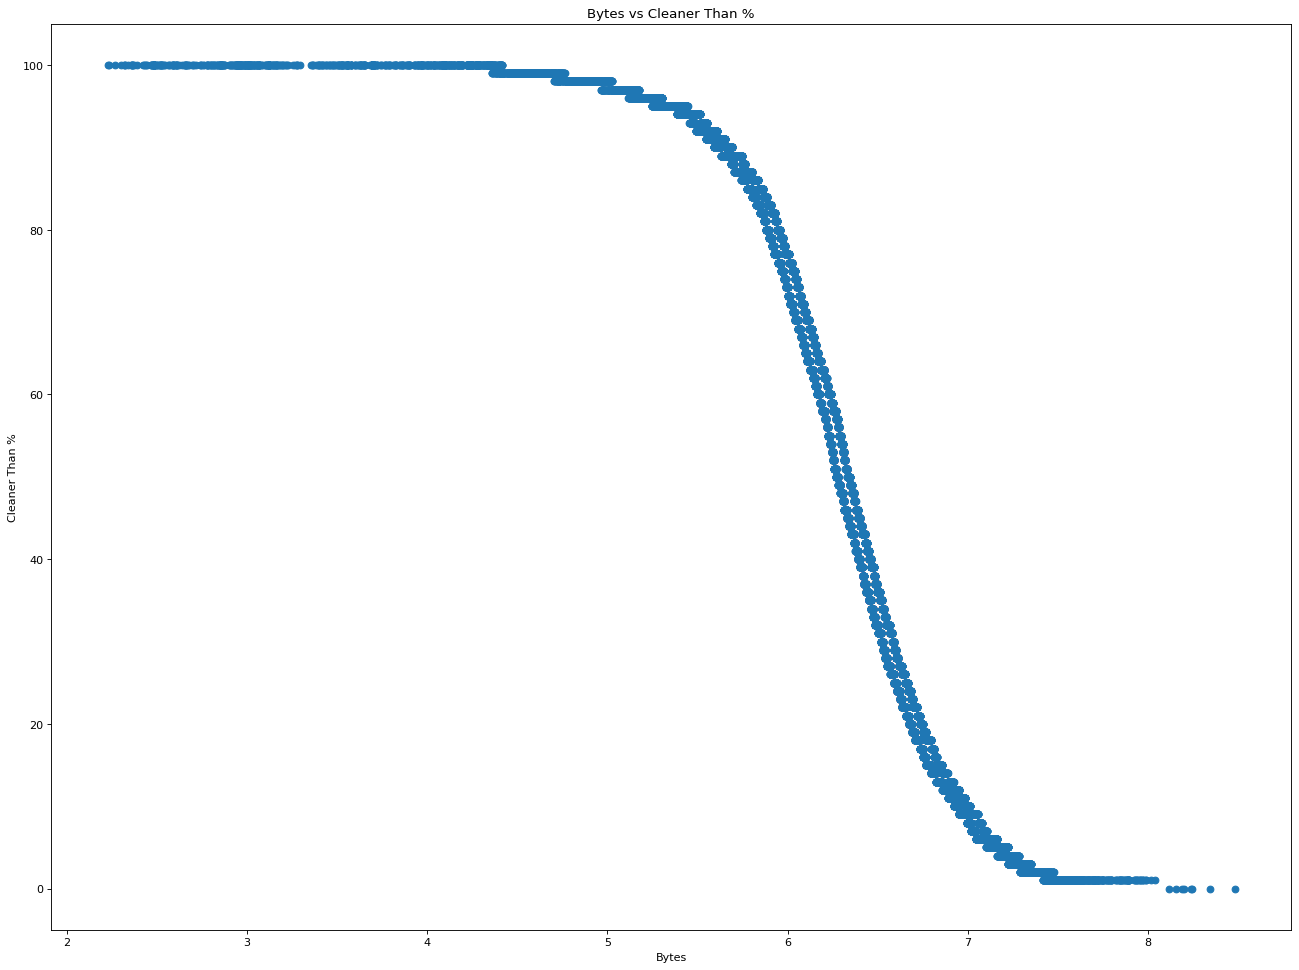

In [140]:
plt.figure(figsize=(20, 15), dpi=80)
plt.scatter(np.log10(df["Bytes"]), df["Cleaner Than %"])
plt.title("Bytes vs Cleaner Than %")
plt.xlabel("Bytes")
plt.ylabel("Cleaner Than %")
plt.show()

In [141]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(20, 15), dpi=80)
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(np.log10(dfmain["Bytes"]), dfmain["Cleaner Than %"], np.log10(dfmain["Statistics: Energy"]), s=30)
# plt.show()

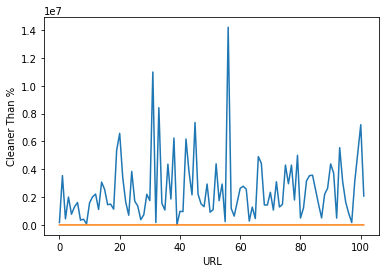

In [142]:
plt.plot(df["Bytes"][:100])
plt.plot(df["Cleaner Than %"][:100])

plt.xlabel("URL")
plt.ylabel("Cleaner Than %")
plt.show()

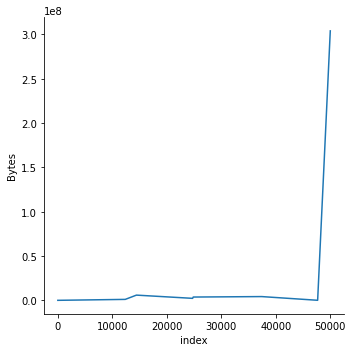

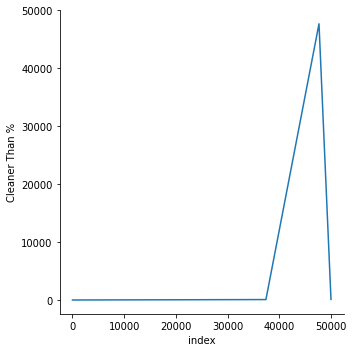

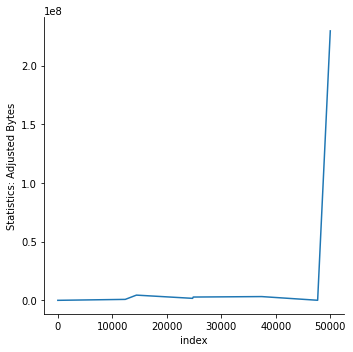

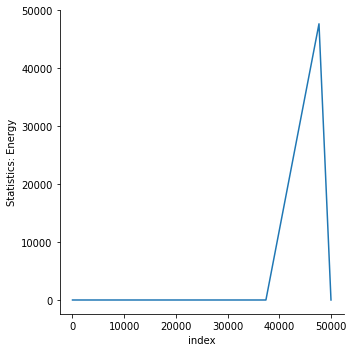

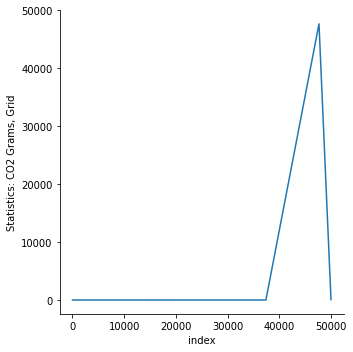

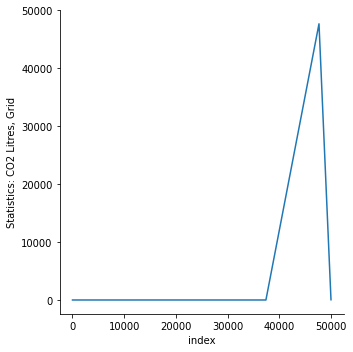

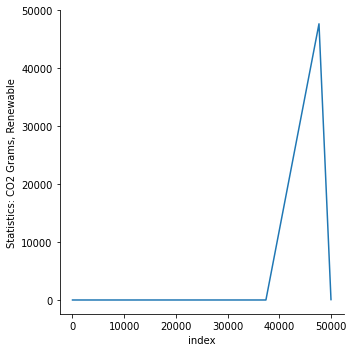

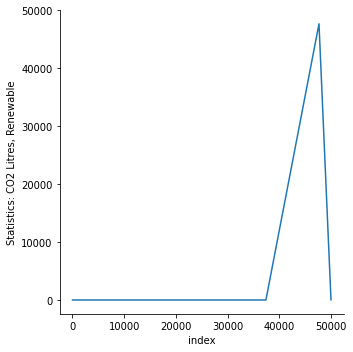

In [143]:
total_columns = df.columns
number_columns = df._get_numeric_data().columns
category_columns = list(set(total_columns)-set(number_columns))

describe_num_df = df.describe(include=['int64', 'float64'])
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in number_columns:
  if i in ['index']:
    continue
  sns.relplot(x='index', y=i, data=describe_num_df, kind='line')
  plt.show()

<AxesSubplot:>

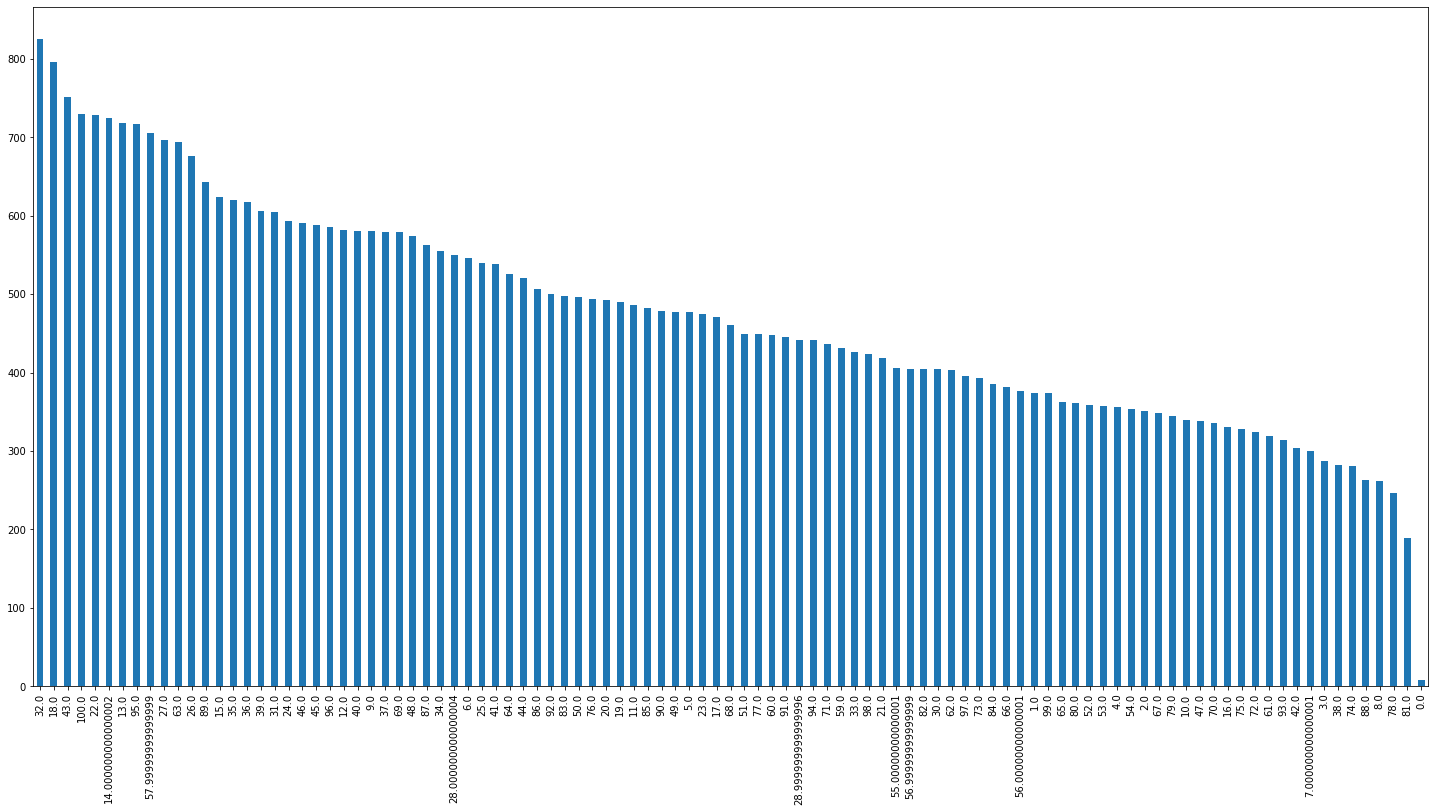

In [144]:
fig, ax = plt.subplots()
df['Cleaner Than %'].value_counts().plot(ax=ax, kind='bar', figsize=(25, 12.5))

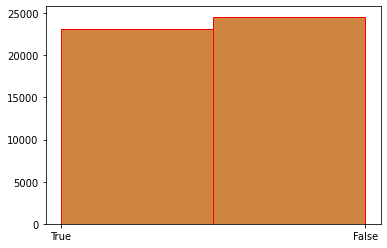

In [145]:
plt.hist(df['Green Hosting'], facecolor = 'peru', edgecolor = 'red', bins=2)
plt.show()

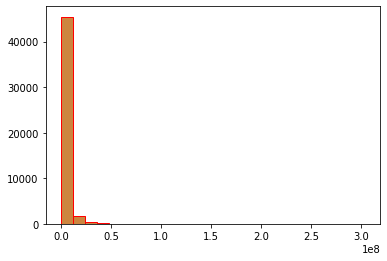

In [146]:
plt.hist(df['Bytes'], facecolor = 'peru', edgecolor = 'red', bins=25)
plt.show()

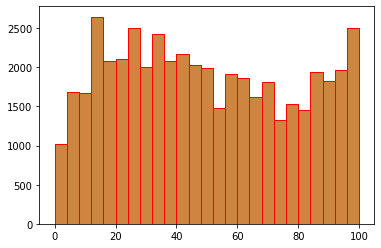

In [147]:
plt.hist(df['Cleaner Than %'], facecolor = 'peru', edgecolor = 'red', bins=25)
plt.show()

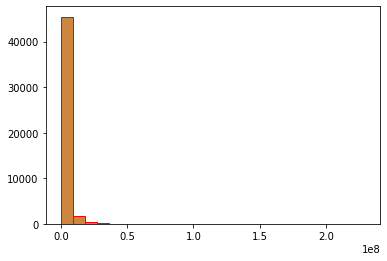

In [148]:
plt.hist(df['Statistics: Adjusted Bytes'], facecolor = 'peru', edgecolor = 'red', bins=25)
plt.show()

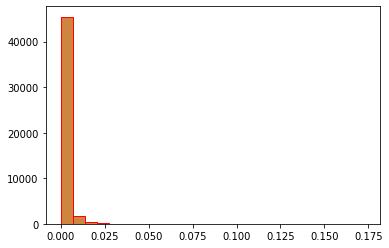

In [149]:
plt.hist(df['Statistics: Energy'], facecolor = 'peru', edgecolor = 'red', bins=25)
plt.show()

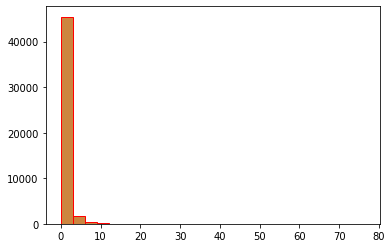

In [150]:
plt.hist(df['Statistics: CO2 Grams, Grid'], facecolor = 'peru', edgecolor = 'red', bins=25)
plt.show()

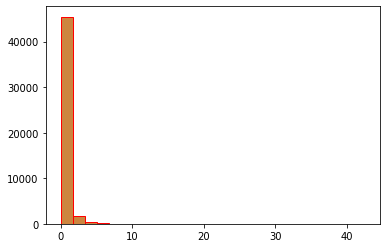

In [151]:
plt.hist(df['Statistics: CO2 Litres, Grid'], facecolor = 'peru', edgecolor = 'red', bins=25)
plt.show()

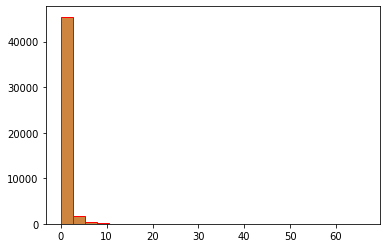

In [152]:
plt.hist(df['Statistics: CO2 Grams, Renewable'], facecolor = 'peru', edgecolor = 'red', bins=25)
plt.show()

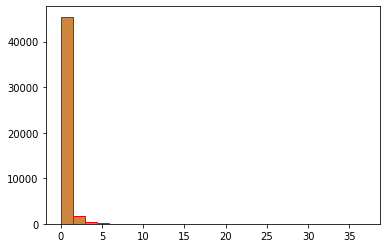

In [153]:
plt.hist(df['Statistics: CO2 Litres, Renewable'], facecolor = 'peru', edgecolor = 'red', bins=25)
plt.show()

([<matplotlib.patches.Wedge at 0x1837c909ab0>,
 [Text(-0.053572851729747344, 1.0986946571079441, 'False'),
  Text(0.05357274886252903, -1.0986946621237916, 'True')],
 [Text(-0.02922155548895309, 0.5992879947861512, '51.6%'),
  Text(0.029221499379561287, -0.5992879975220681, '48.4%')])

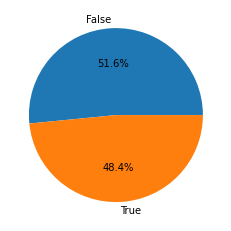

In [154]:
plt.pie(df['Green Hosting'].value_counts(), labels=df['Green Hosting'].value_counts().index, autopct='%1.1f%%')

<AxesSubplot:>

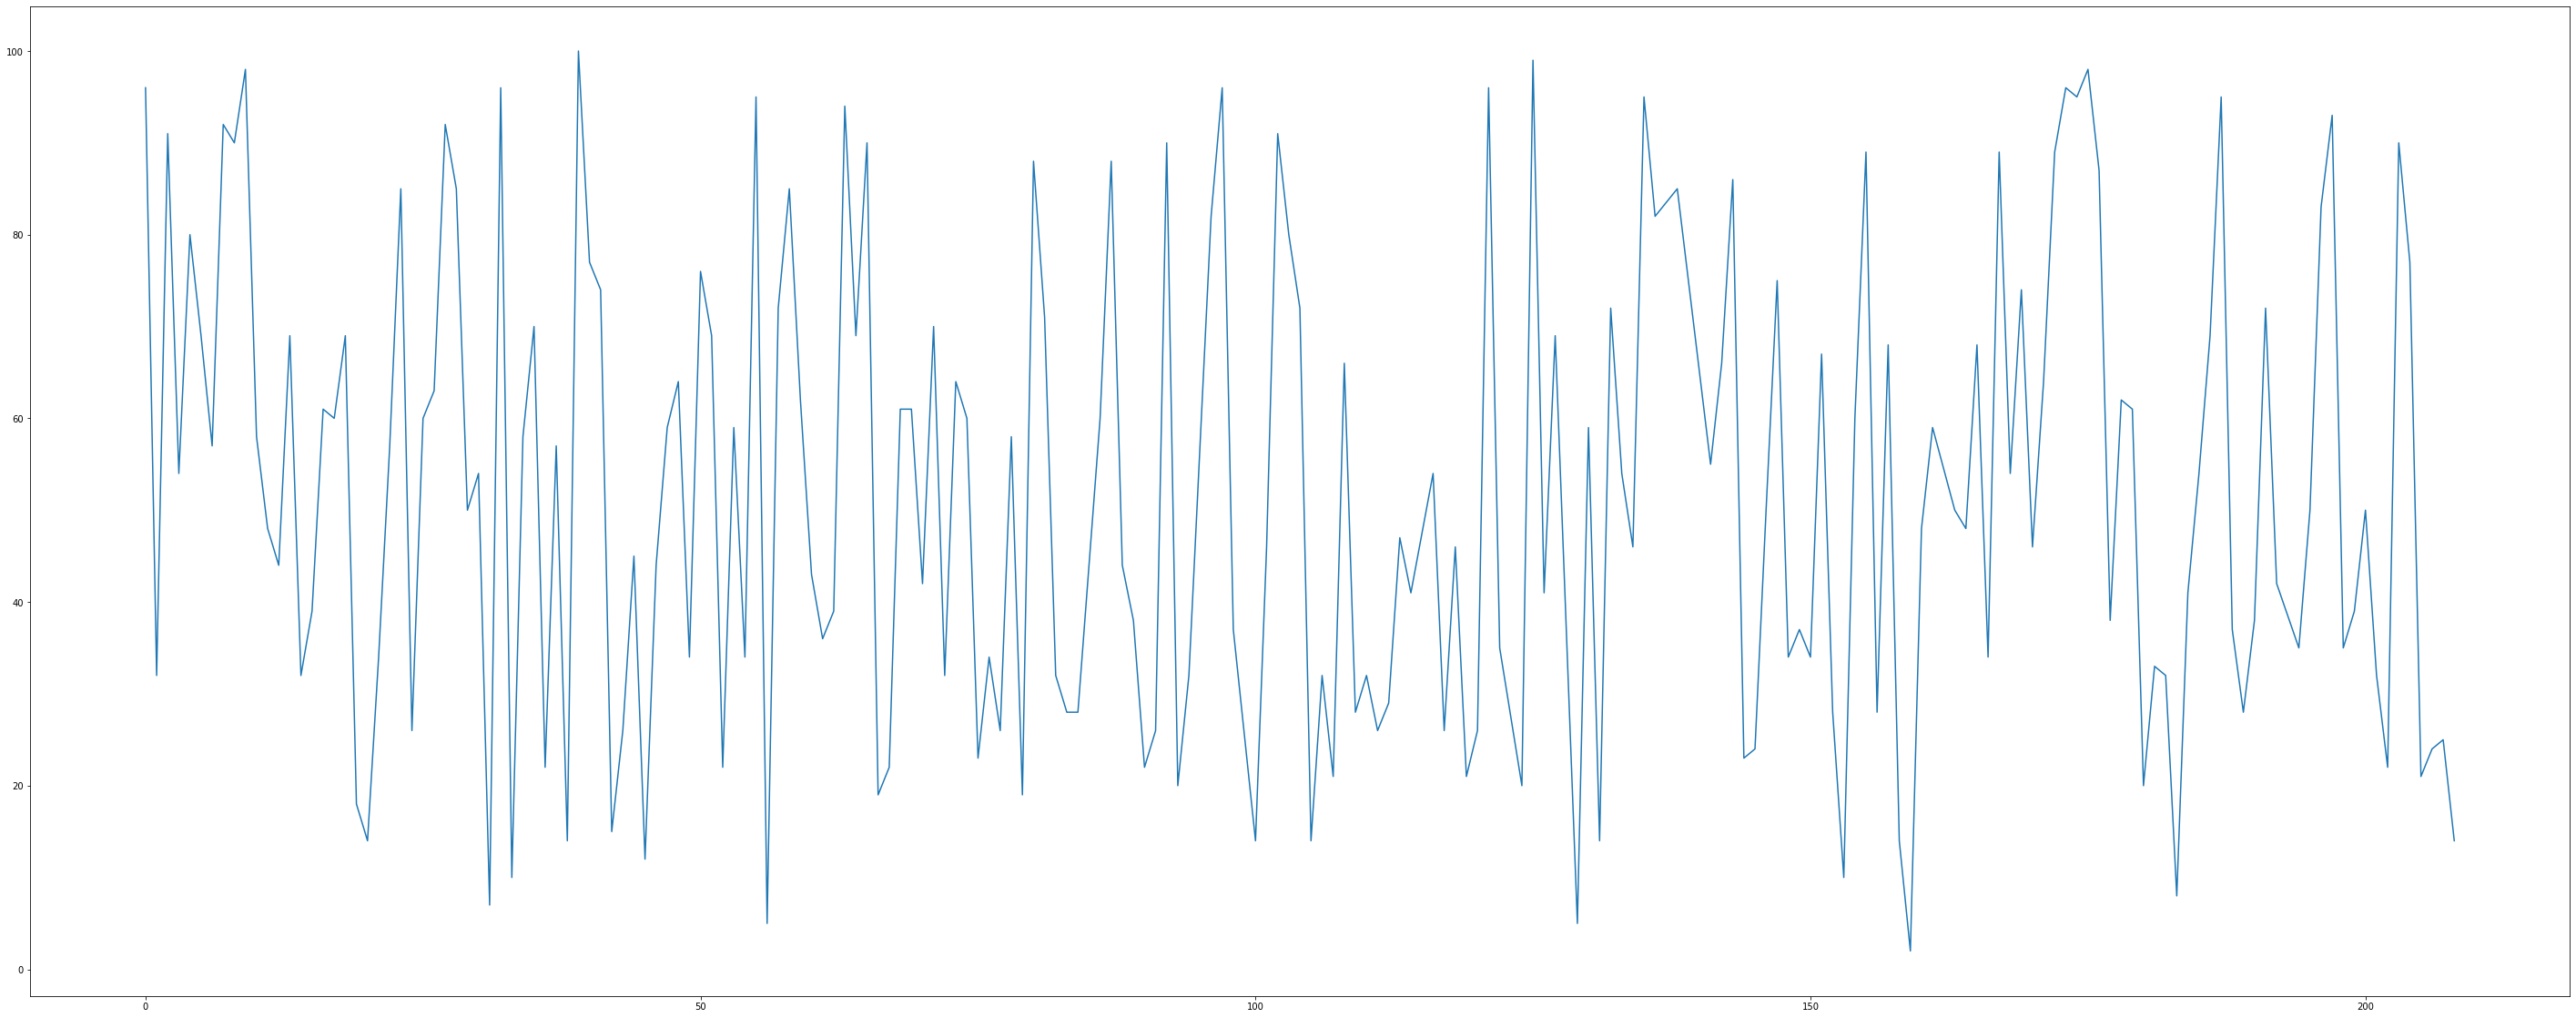

In [155]:
df['Cleaner Than %'][:200].plot.line(figsize=(50, 20))

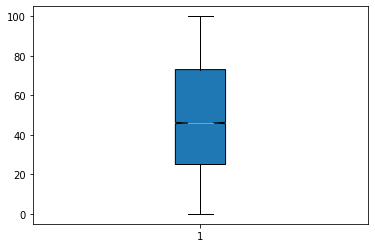

In [156]:
plt.boxplot(df['Cleaner Than %'], notch=True, patch_artist=True)
plt.show()

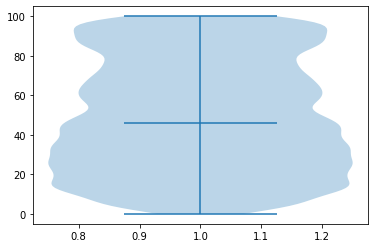

In [157]:
plt.violinplot(df['Cleaner Than %'], showmedians=True)
plt.show()

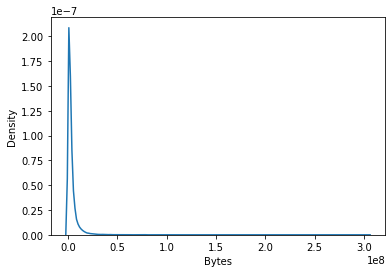

In [158]:
sns.kdeplot(df['Bytes'])
plt.show()

In [159]:
with pd.option_context("display.max_rows", 1000):
    print(df[df['URL'].str.contains("https://www.google.com/")])

                                                URL Green Hosting     Bytes  \
0                           https://www.google.com/          True    170821   
268    https://www.google.com/business/?ppsrc=GPDA2          True    810441   
308                https://www.google.com/business/          True    824221   
2747                 https://www.google.com/chrome/          True    538931   
7745        https://www.google.com/chromebook/apps/         False  11067167   
23155                    https://www.google.com/?v2          True    798586   
33892                   https://www.google.com/maps          True   1924542   

       Cleaner Than %  Statistics: Adjusted Bytes  Statistics: Energy  \
0                96.0                  128969.855            0.000097   
268              83.0                  611882.955            0.000462   
308              82.0                  622286.855            0.000469   
2747             89.0                  406892.905            0.000307   
77

In [160]:
df["Cleaner Than %"].describe()

count    47683.000000
mean        49.081203
std         28.617627
min          0.000000
25%         25.000000
50%         46.000000
75%         73.000000
max        100.000000
Name: Cleaner Than %, dtype: float64

In [161]:
df.loc[df['Cleaner Than %'] == 0]

,URL,Green Hosting,Bytes,Cleaner Than %,Statistics: Adjusted Bytes,Statistics: Energy,"Statistics: CO2 Grams, Grid","Statistics: CO2 Litres, Grid","Statistics: CO2 Grams, Renewable","Statistics: CO2 Litres, Renewable",Timestamp,index
18209,https://www.ittefaq.com.bd/,True,158429770,0.0,1.196145e+08,0.090234,39.883307,22.183095,34.577564,19.232041,2022-05-06 14:01:03,18209
20720,https://vnexplorer.net/,False,153772730,0.0,1.160984e+08,0.087581,38.710938,21.531024,33.561157,18.666716,2022-05-06 19:19:45,20720
22691,https://www.xdraco.com/,False,144149539,0.0,1.088329e+08,0.082100,36.288384,20.183599,31.460879,17.498541,2022-05-07 09:09:13,22691
36484,https://warnerbrosgames.com/,False,174746287,0.0,1.319334e+08,0.099527,43.990847,24.467709,38.138671,21.212729,2022-05-14 10:05:08,36484
39068,https://www.cuntempire.com/,False,173488420,0.0,1.309838e+08,0.098810,43.674190,24.291585,37.864140,21.060034,2022-05-14 13:04:43,39068
40959,https://porno-island.site/,True,221431538,0.0,1.671808e+08,0.126116,55.743450,31.004507,48.327806,26.879926,2022-05-15 10:19:45,40959
41527,https://lematin.ma/,True,304084175,0.0,2.295836e+08,0.173191,76.550528,42.577404,66.366883,36.913260,2022-05-15 12:40:01,41527
43628,https://www.mbs1179.com/,False,131234648,0.0,9.908216e+07,0.074745,33.037173,18.375276,28.642183,15.930782,2022-05-17 09:41:45,43628
